# Lecture 5: SGD Variants and Multiclass Classification Solutions
***

<img src="figs/mountains.jpg" width=1100 height=50>


**Reminder**:  Scroll down and shift-enter the **Helper Functions**
***

### Problem 1: The Learning Rate Schedule Game
***

In the case when your negative log-likelihood function is convex, the choice of learning rate mainly affects the convergence of your SGD routine.  In a nonconvex problem, the choice of learning rate can determine whether you find the global minimum, or get stuck forever in a local minimum.  In most sophisticated optimization routines, the learning rate is adapted over time.  Varying learning rate schedules allow you to explore local minimums but still be able to make it out and eventually find the global minimum.  

The following game is a cheap facsimile of stochastic gradient descent.  There is no negative log-likelihood function, or training set.  You just have a simple function that you would like to minimize, namely 

$$
f(x,y) = 5-\sin(3 \pi x) ~ \sin(3 \pi y) - 3~\textrm{exp}\left[{-\left(x-\frac{1}{2}\right)^2 - \left(y-\frac{1}{2}\right)^2}\right]
$$

The surface looks as follows.  Notice that there is a global minimum at $(1/2,1/2)$ and several local maxima and minima surrounding it. 


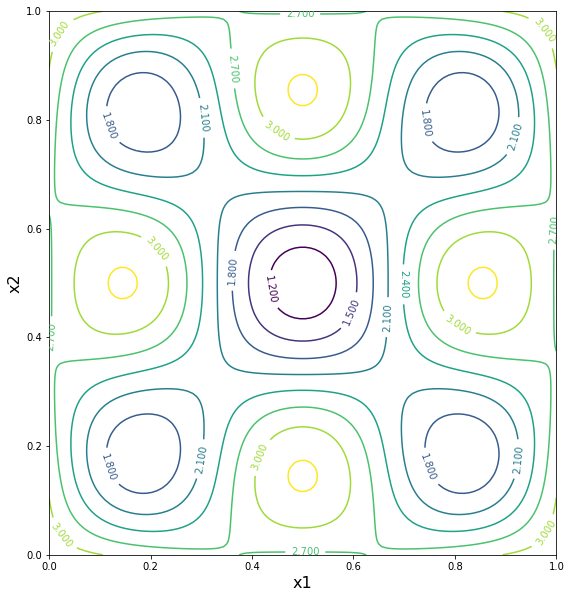

In [14]:
plot_nc_surface()

I've given you a starting point and a basic gradient descent algorithm (located in the Helper Functions section below).  Below this cell there is a learning rate scheduling function that currently just returns the initial learning rate that you prescribe.  The goal of this game is for you to adjust the initial learning rate and the scheduling function that allows the iterate to make it to the global minimum.  The **only** things you're allowed to change are the **initial learning rate** and the **schedule function**.   Before you can play you need to evaluate the code-blocks at the bottom of the page.  Then come back and evaluate the $\texttt{playgame}$ function with it's current inputs and see what happens! 

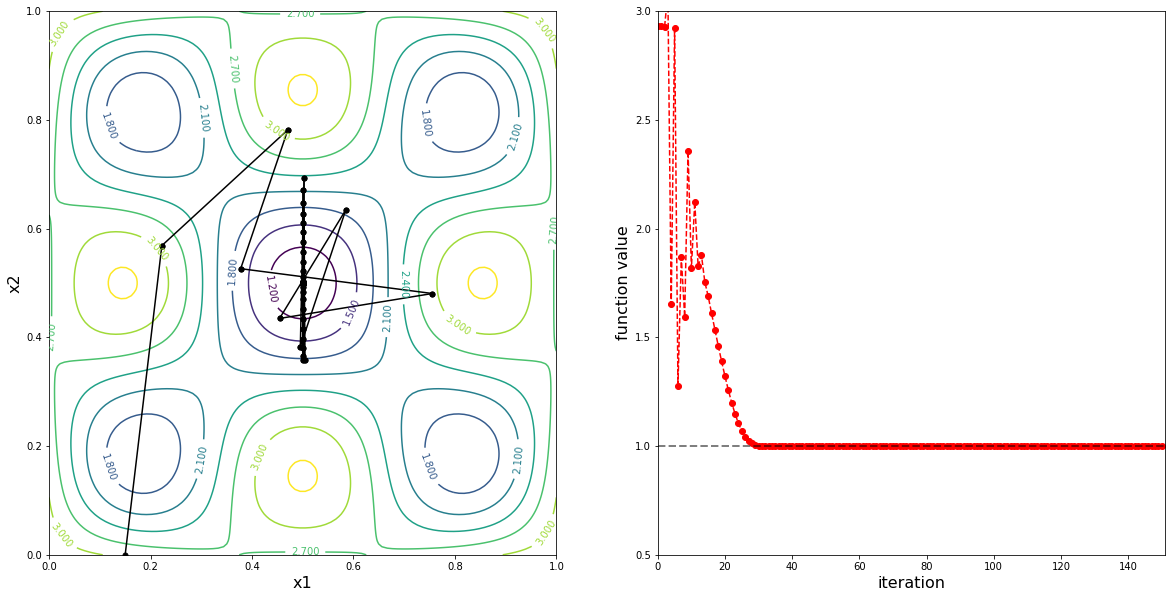

In [15]:
def schedule(k, n, eta0):
    '''
    :param k: The current iteration 
    :param n: The max number of iterations
    :param eta0: The original learning rate 
    '''
    return eta0/(1 + 10*k/n)

playgame(np.array([0.15,0.0]), 150, .05)

***
**Hint**: If you're not having much luck, try implementing a schedule of the form 
$
\eta_k = \dfrac{\eta_0}{ 1 + \alpha ~ k~/~n}
$ where here $\alpha$ is a tuning parameter.  You'll probably also have to make your initial learning rate bigger. 
***

### Problem 2: Momentum 
***

In this problem you can play around with a cheap facsimile for SGD with momentum.  This time we'll keep the learning rate constant and work on a deterministic problem with a convex objective function.  Namely, we'll try to find the minimum of 

$$
f(x,y) = 1 + \frac{1}{100}(x^2 + 20y^2)
$$

which has it's minimum of $1$ at the point $(0,0)$.  

Execute the following function to see a plot of the level curves of $f$

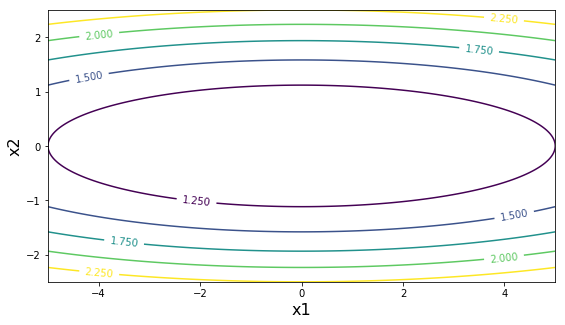

In [16]:
plot_con_surface()

Elongated level curves such as this can often cause problems for gradient descent algorithms.  The following function implements gradient descent with momentum, but can impersonate vanilla gradient sent by keeping the momentum parameter, $\mu$, set to zero.  Play around with various values of the learning rate, $\eta$, and see what happens. Once you've settled on a reasonable learning rate, play around with the momentum parameter and see if you can make improvements. 

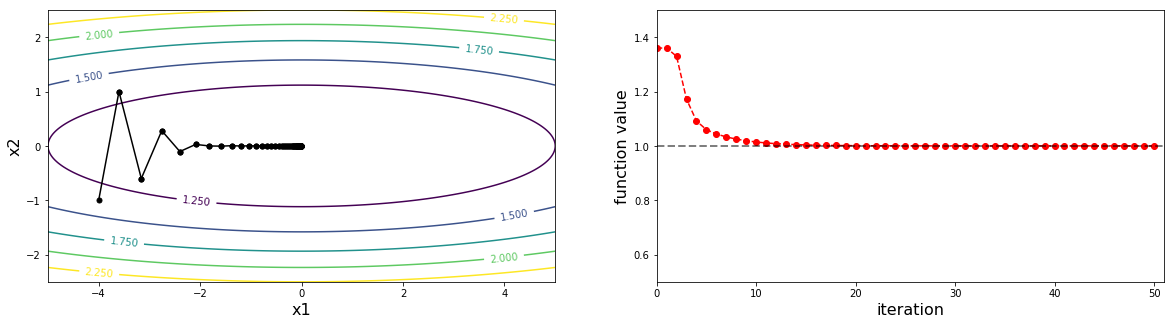

In [17]:
playmomentum(np.array([-4.0,-1.0]), 50, eta0=5.0, mu=0.2)


<br>

### Problem 3: Multiclass Issues 
***

**Q**: What are some potential difficulties with the One-vs-All binary classification scheme? 


**A**: An obvious problem is class imbalance.  If you have an initially balanced data set with 5 class labels, then each binary classification in One-vs-All will have a class balance of 80%/20%. 

**Q**: What are some potential remedies for this? 

**A**: There are lots of things that you can try.  Here are some suggestions in order of increasing brilliance: 

**Undersampling**: You can undersample the $\texttt{NotK}$ class so that it is balanced with the $\texttt{IsK}$ class

**Oversampling**: You can oversample the $\texttt{IsK}$ class by synthetic means.  For example, in handwritten digit recognition (a problem with $K = 10$ classes) you can create synthetic data by applying elementary transformations to digit images (translation, rotation, skewing, etc).  There are fancier generic methods out there like <a href="https://www.jair.org/media/953/live-953-2037-jair.pdf">SMOTE</a>. 

**Undersampling Ensemble**: Divide the *all* parts of the data set into $K-1$ different training sets, train $K-1$ balanced binary classifiers, and then ensemble the results. 

**Cost Sensitive Learning**: Construct your loss functions so that they weight the minority class in a stronger way 

For more information on training imbalanced data sets see <a href="http://www.ijcst.com/icaccbie11/sp1/krishnaveni.pdf">this review</a>. 


<br>
<br>

<a id='prob2ans'></a>

### Problem 4: Multiclass Classification and Error Correcting Output Codes 
***

We've seen the One-vs-All and All-Pairs framework for reducing multiclass classification to binary classification.  In this problem we explore a similar (but different) framework that has become popular based on the theory of error correcting codes.  Consider the following binary coding matrix: 

$$
\begin{array}{ccccc}
\hline
\textrm{Class} & h_0 & h_1 & h_2 & h_3 & h_4 \\ 
\hline
0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 & 1 & 1 \\
2 & 1 & 1 & 0 & 0 & 0 \\
3 & 1 & 1 & 1 & 1 & 0 \\
\hline
\end{array}
$$

Think of each column in the binary coding matrix as a hypothesis where the entries in the columns define binary *super classes*. The general idea is similar to One-vs-All and All-Pairs in the sense that we'll assign binary labels to different classes for each classifier, perform binary classifications, and then assign a final class to a query point according to some procedure.   The motivation behind the ECOC scheme is that the combinations of the bit representation of each class should be robust to minor classification errors.  

To see this, notice that in the example above each bit-string or *codeword* associated with each class differs by at least **two** bits, i.e. their Hamming Distances are at least 2.  What this means is that if you make predictions based on the trained binary classifiers to obtain a codeword representation of a query point, even if it's off by one predicted bit you **might** be able to obtain the correct general classification by using a distance measure.  

Here is an example of an ECOC scheme for classifying handwritten digits for the MNIST data set: 

<img src="figs/k15ecoc.png" width=300 height=50>

Any guesses what the hypotheses in the column headers mean?

<p> </p>

**Example**: Suppose you want to predict the nationality of a person given their last name.  Your training set is 

$$
\begin{array}{ccc}
\hline 
\textrm{Korean} & \textrm{German} & \textrm{Argentine} \\
\hline 
\textrm{Park} & \textrm{Mann} & \textrm{Puig} \\
\textrm{Kim} & \textrm{Berndt} & \textrm{Borges} \\
\textrm{Kwon} & \textrm{Grass} & \textrm{Cortazar} \\
\hline 
\end{array}
$$

Suppose that the codebook you will use looks like 

$$
\begin{array}{ccccc}
\hline
\textrm{Class} & h_0 & h_1 & h_2 & h_3 \\ 
\hline
\textrm{Korean}    & 1 & 0 & 0 & 1  \\
\textrm{German}    & 0 & 0 & 1 & 0  \\
\textrm{Argentine} & 1 & 1 & 1 & 0  \\
\hline
\end{array}
$$

**Q**: What are the binary labels corresponding to each training example under each hypothesis? 


**A**: We have the following labels

$$
\begin{array}{ccccc}
 ~ & h_0 & h_1 & h_2 & h_3 \\ 
\hline
\textrm{Park}     & 1 & 0 & 0 & 1  \\
\textrm{Kim}      & 1 & 0 & 0 & 1  \\
\textrm{Kwon}     & 1 & 0 & 0 & 1  \\
\textrm{Mann}     & 0 & 0 & 1 & 0  \\
\textrm{Berndt}   & 0 & 0 & 1 & 0  \\
\textrm{Gross}    & 0 & 0 & 1 & 0  \\
\textrm{Puig}     & 1 & 1 & 1 & 0  \\
\textrm{Borges}   & 1 & 1 & 1 & 0  \\
\textrm{Cortazar} & 1 & 1 & 1 & 0  \\
\hline
\end{array}
$$

**Q**: Suppose that the predictions for a given query point are given by $\hat{y} = (0,0,0,1)$.  Which class would we predict? 

**A**: Taking the Hamming Distance between $\hat{y}$ and each row of the codebook gives 

$$
\begin{array}{ll}
\textrm{Korean:} & \|(1,0,0,1) - (0,0,0,1)\|_1 = 1 + 0 + 0 + 0 = 1 \\
\textrm{German:} & \|(0,0,1,0) - (0,0,0,1)\|_1 = 0 + 0 + 1 + 1 = 2 \\
\textrm{Argentine:} & \|(1,1,1,0) - (0,0,0,1)\|_1 = 1 + 1 + 1 + 1 = 4 \\
\end{array}
$$

So we would predict that the name is  of Korean descent. 

**Q**: Suppose that the predictions for a given query point are given by $\hat{y} = (1,1,0,0)$.  Which class would we predict? 

**A**: Taking the Hamming Distance between $\hat{y}$ and each row of the codebook gives 

$$
\begin{array}{ll}
\textrm{Korean:} & \|(1,0,0,1) - (1,1,0,0)\|_1 = 0 + 1 + 0 + 1 = 2 \\
\textrm{German:} & \|(0,0,1,0) - (1,1,0,0)\|_1 = 1 + 1 + 1 + 0 = 3 \\
\textrm{Argentine:} & \|(1,1,1,0) - (1,1,0,0)\|_1 = 0 + 0 + 1 + 0 = 1 \\
\end{array}
$$

So we would predict that the name is  of Argentine descent. 

**Q**: For a classification problem with three classes, what would the codebook be corresponding to One-vs-All classification? 

**A**: First, since we're doing One-vs-All with three classes we're going to need three hypothesis.  One codebook that works is as follows: 

$$
\begin{array}{ccccc}
\hline
\textrm{Class} & h_0 & h_1 & h_2 \\ 
\hline
 0 & 1 & 0 & 0  \\
 1 & 0 & 1 & 0  \\
 2 & 0 & 0 & 1  \\
\hline
\end{array}
$$

**Q**: How many useful codewords can you have for a three-class classifier? 

**A**: Only **three**.  To see this, recognize that with three class there are $2^3$ possible hypotheses

$$
\begin{array}{ccccc}
\hline
\textrm{Class} & h_0 & h_1 & h_2 & h_3 & h_4 & h_5 & h_6 & h_7 \\ 
\hline
 0 & 1 & 0 & 0 & 1  & 0  & 1  & 0 & 1 \\ 
 1 & 0 & 1 & 0 & 1  & 1  & 0  & 0 & 1 \\ 
 2 & 0 & 0 & 1 & 0  & 1  & 1  & 0 & 1 \\ 
\hline
\end{array}
$$

Now notice that half of them are complements of each other and for classification the last two columns do not help at all.  

The useful columns in this case correspond to the All-vs-One classifier. Notice that in this case the minimal Hamming Distance is 2, which means that we can't correct any errors. 


**Q**: What is a general formula for the number of useful hypotheses in a K-class setting? 

**A**: The general formula is $2^{K-1} - 1$. Subtract 1 from the exponent to get rid of the complements, then subtract the one remaining single-signed hypothesis. 

It turns out that the ECOC method becomes more helpful the more classes you have.  For example, for a $K=10$ class problem you can use a codebook with $15$ hypothesis that gives a minimal Hamming Distance of $d=7$ between any two codewords.  This means that such a ECOC method can correct up to $\lfloor (d-1)/2\rfloor = 3$ single bit classification errors.  Here is an example of a codebook for such a scheme: 

<img src="figs/mnistecoc.png" width=800 height=50>

For more information on ECOCs in multiclass classification check out the original paper by <a href="https://www.jair.org/media/105/live-105-1426-jair.pdf">Dietterich and Bakiri</a> or this paper by <a href="http://amstat.tandfonline.com/doi/abs/10.1080/10618600.1998.10474782">James and Hastie</a>. 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

<a id='helpers'></a>

### Helper Functions
***

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def myncfun(x, y): 
    return 5 - np.sin(3*np.pi*x)*np.sin(3*np.pi*y) - 3*np.exp(-(x-.5)**2 - (y-.5)**2)

def myncgrad(x):
    g1 = -3 * np.pi * np.cos(3*np.pi*x[0]) * np.sin(3*np.pi*x[1]) + 6 * (x[0]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    g2 = -3 * np.pi * np.sin(3*np.pi*x[0]) * np.cos(3*np.pi*x[1]) + 6 * (x[1]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    return np.array([g1, g2])

def SGD(x, numstep, eta0):
    '''
    :param x: Starting point 
    :param numstep: Total number iterations 
    :param eta0: Initial learning rate 
    '''
    xhist = np.zeros((numstep+1,2))
    xhist[0,:] = x 
    for kk in range(numstep):
        x = x - schedule(kk, numstep, eta0) * myncgrad(x)
        xhist[kk+1,:] = x 
    return xhist

def playgame(x0, numstep, eta0):
    '''
    :param x0: The starting point 
    :param numstep: The total number of iterations to do 
    :param eta0: The original learning rate 
    '''
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myncfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])

    xhist = SGD(x0, numstep, eta0)
    
    fvals = np.zeros(numstep+1)
    fvals[0] = myncfun(x0[0], x0[1])

    for ii in range(xhist.shape[0]-1):
        x0 = xhist[ii][0]
        y0 = xhist[ii][1]
        x1 = xhist[ii+1][0]
        y1 = xhist[ii+1][1]
        ax1.plot([x0, x1], [y0,y1], color="black", marker="o", lw=1.5, markersize=5)
        fvals[ii+1] = myncfun(x0, y0)
        
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)
        
    maxval = myncfun(0.5,0.5)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(fvals, 'r--', marker="o")
    ax2.plot([0, numstep+1], [maxval, maxval], 'k--', lw=2, alpha=0.5)
    plt.xlim([0,numstep+1])
    plt.ylim([.5,3])
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("function value", fontsize=16);
    
    
def plot_nc_surface():
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myncfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)    
    
    
def plot_con_surface():
    xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-2.5, 2.5, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z, 5)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([-5,5])
    plt.ylim([-2.5,2.5])
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)   
    
def playmomentum(x0, numstep, eta0, mu):
    '''
    :param x0: The starting point 
    :param numstep: The total number of iterations to do 
    :param eta0: The original learning rate 
    '''
    xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-2.5, 2.5, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z, 5)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([-5,5])
    plt.ylim([-2.5,2.5])
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)

    xhist = momentumSGD(x0, numstep, eta0, mu)
    
    fvals = np.zeros(numstep+1)
    fvals[0] = myfun(x0[0], x0[1])

    for ii in range(xhist.shape[0]-1):
        x0 = xhist[ii][0]
        y0 = xhist[ii][1]
        x1 = xhist[ii+1][0]
        y1 = xhist[ii+1][1]
        ax1.plot([x0, x1], [y0,y1], color="black", marker="o", lw=1.5, markersize=5)
        fvals[ii+1] = myfun(x0, y0)
        
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)
        
    maxval = myfun(0.0,0.0)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(fvals, 'r--', marker="o")
    ax2.plot([0, numstep+1], [maxval, maxval], 'k--', lw=2, alpha=0.5)
    plt.xlim([0,numstep+1])
    plt.ylim([.5,1.5])
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("function value", fontsize=16);
    
def momentumSGD(x, numstep, eta0, mu):
    '''
    :param x: Starting point 
    :param numstep: Total number iterations 
    :param eta0: Initial learning rate 
    '''
    xhist = np.zeros((numstep+1,2))
    xhist[0,:] = x 
    vold = 0.0*x 
    for kk in range(numstep):
        vnew = eta0 * mygrad(x) + mu * vold 
        vold = vnew 
        x = x - vnew 
        xhist[kk+1,:] = x 
    return xhist

def mygrad(x):
    g1 = .02*x[0]
    g2 = 0.4*x[1]
    return np.array([g1, g2])

def myfun(x, y): 
    return 1.0 + 0.01*(x**2 + 20*y**2)
    
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")